In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
infy = pd.read_csv(r'C:\Users\Shivam Singh Rajput\Desktop\kagle\time series\INFY.NS.csv',parse_dates=["Date"],index_col="Date")

In [34]:
infy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,0.79492,0.79883,0.78418,0.78418,-0.000426,870400
1996-01-08,0.78418,0.79102,0.77148,0.78662,-0.000427,2764800
1996-01-15,0.77637,0.78516,0.71289,0.76855,-0.000417,2150400
1996-01-22,0.77148,0.78125,0.75293,0.76758,-0.000417,1382400
1996-01-29,0.76563,0.83984,0.76318,0.83975,-0.000456,5171200


In [37]:
infy.shape

(1257, 6)

In [4]:
infy.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [60]:
data_set = infy.iloc[:,0:1]

In [70]:
training_set = infy.iloc[0:1237,0:1].values

In [71]:
test_set = infy.iloc[1237:,0:1].values

In [72]:
training_set    #converted into array

array([[7.94920000e-01],
       [7.84180000e-01],
       [7.76370000e-01],
       ...,
       [7.95900024e+02],
       [8.14900024e+02],
       [8.36799988e+02]])

In [75]:
test_set.shape

(20, 1)

In [49]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler

In [50]:
sc = MinMaxScaler(feature_range= (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [51]:
# creating a dataset with 60 timesteps and 1 output

In [52]:
X_train = []
y_train = []
for i in range(60,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [53]:
X_train.shape

(881, 60)

In [54]:
#reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [55]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [56]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [57]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [82]:
regressor.fit(X_train,y_train, epochs = 100, batch_size = 32)

Epoch 1/100
881/881 [==============================] - 4s 5ms/step - loss: 0.0027
Epoch 2/100
881/881 [==============================] - 4s 5ms/step - loss: 0.0026
Epoch 3/100
881/881 [==============================] - 4s 5ms/step - loss: 0.0025
Epoch 4/100
881/881 [==============================] - 4s 5ms/step - loss: 0.0024
Epoch 5/100
881/881 [==============================] - 4s 5ms/step - loss: 0.0023
Epoch 6/100
881/881 [==============================] - 4s 5ms/step - loss: 0.0025
Epoch 7/100
881/881 [==============================] - 4s 5ms/step - loss: 0.0024
Epoch 8/100
881/881 [==============================] - 4s 5ms/step - loss: 0.0024
Epoch 9/100
881/881 [==============================] - 4s 5ms/step - loss: 0.0025
Epoch 10/100
881/881 [==============================] - 5s 5ms/step - loss: 0.0024
Epoch 11/100
881/881 [==============================] - 4s 5ms/step - loss: 0.0027
Epoch 12/100
881/881 [==============================] - 7s 8ms/step - loss: 0.0023
Epoch 13/100


881/881 [==============================] - 5s 5ms/step - loss: 0.0020
Epoch 100/100
881/881 [==============================] - 8s 9ms/step - loss: 0.0022


In [83]:
inputs = data_set[len(data_set) - len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [84]:
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [85]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [86]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

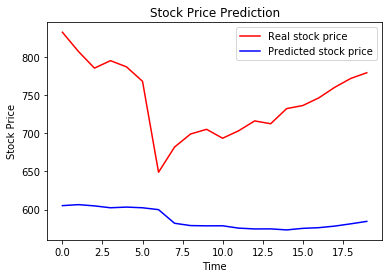

In [87]:
#visualising the result
plt.plot(test_set, color = 'red', label = "Real stock price")
plt.plot(predicted_stock_price, color = "blue", label = "Predicted stock price")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()